 #                          Project On Big_Mart_Sales_Analysis

##### About the dataset :
The dataset is collected by Data Scientists at Big Mart till year 2013. It consists of sales data for 1559 products across 10 stores in different cities.
The attributes of all products have been defined already.In other words it is generally an analysis on products of Big Mart and their sales behavior.


#### Aim:
        Our main is to draw a predictive model which analyse and find out the sales of each particular product at different   stores.

![Big Mart](https://tse3.mm.bing.net/th?id=OIP.UvErPV5nwUzEK64Re489DgHaEK&pid=15.1&P=0&w=317&h=179)

### Attributes of Dataset
1. Item_Identifer
2. Item_Weight
3. Item_Fat_Content
4. Item_Type
5. Item_MRP
6. Outlet_Identifier
7. Outlet_Establishment_Year
8. Outlet_Size
9. Outlet_Location_Type
10. Outlet_Type
11. Item_Outlet_Sales

### Import

In [517]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [518]:
# accessing data or importing dataset through csv file named as big mart
data = pd.read_csv("C:\\Users\\honey\\Desktop\\Acadview_ML\\Big_mart.csv")

In [519]:
# checking data attributes using head Function
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [520]:
# Description of basic statistics on dataset (Big Mart Sales)
print("Here is the description of Big_Mart dataset")
data.describe()

Here is the description of Big_Mart dataset


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [521]:
# Shape of data
print('Here is shape of dataset')
data.shape

Here is shape of dataset


(8523, 12)

#### From the above configuration it is cleared that data has "8523" number of rows and "12" columns 

In [522]:
# Size of data
print('Size of dataset is as follow:')
data.size

Size of dataset is as follow:


102276

In [523]:
# Last 5 rows of dataset
print('A look on last 5 rows of data using tail function')
data.tail()

A look on last 5 rows of data using tail function


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [524]:
# Checking NUll values in data using isnull() function
print('Sum of Null values in each column')
data.isnull().sum()

Sum of Null values in each column


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [525]:
# replacing values or concating similar meaning terminology
# converting 'low fat' into 'Low Fat', 'reg' into 'Regular'
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat',
                                                             'reg':'Regular' ,
                                                             'LF':'Low Fat'} )

#### Here we get null entries in column "Item_Weight" and "Outlet_Size" having 1463 and 2410 null values respectively.

In [526]:
from scipy.stats import mode

# Filling null values of the column with mean of corresponding column
data = data.fillna(data.mean())

# Now Filling the null values with most occuring strings in the respective columns

outlet_size_mode = data.pivot_table(values=['Outlet_Size'] ,columns=['Outlet_Type'],aggfunc=lambda x:mode(x.astype('str')).mode[0])

outlet_size_mode
# Rechecking null values
#data.isnull().sum()

C:\Users\honey\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,nan,Small,Medium,Medium


In [527]:
data['Outlet_Size'] = np.where(((data['Outlet_Size'].isnull()) &
                               (data['Outlet_Type']=="Grocery Store")),\
                               "Small",data['Outlet_Size'])

a=data[data['Outlet_Type']=="Supermarket Type1"]['Outlet_Size'].mode()

b=data[data['Outlet_Type']=="Supermarket Type2"]['Outlet_Size'].mode()

c=data[data['Outlet_Type']=="Grocery Store"]['Outlet_Size'].mode()

d=data[data['Outlet_Type']=="Supermarket Type3"]['Outlet_Size'].mode()
print(a,b,c,d)


0    Small
dtype: object 0    Medium
dtype: object 0    Small
dtype: object 0    Medium
dtype: object


In [528]:
data['Outlet_Size'] = np.where(((data['Outlet_Size'].isnull()) &
                               (data['Outlet_Type']=="Supermarket Type2")),\
                               "Medium",data['Outlet_Size'])
                                             


In [529]:
data['Outlet_Size'] = np.where(((data['Outlet_Size'].isnull()) &
                               (data['Outlet_Type']=="Supermarket Type1")),\
                               "Medium",data['Outlet_Size'])

#data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))


#### As shown from the above it is cleared that there is no null values remaining after filling null values column with mean values.

In [530]:
print(data.isnull().sum())

data.head()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univariate Analysis

##### Outlet_Size - plot

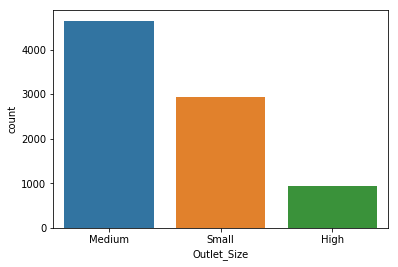

In [531]:
sns.countplot(data =data, x='Outlet_Size')

The above plot directly shows that mostly products are of medium outlet size, with high has lowest one.

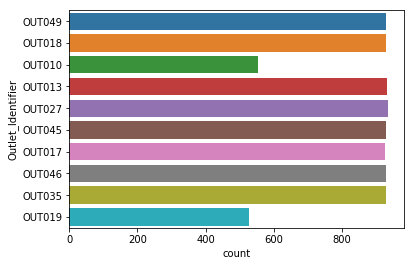

In [532]:
sns.countplot(data = data,y="Outlet_Identifier")

The above plot shows that mostly product identifier has a higher range value more than 800

##### Item_Fat_Content - plot

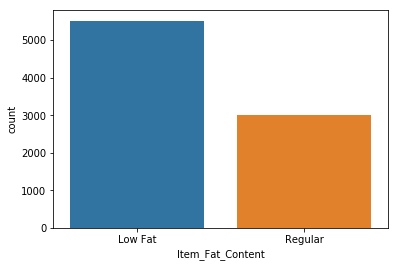

In [533]:
sns.countplot(data = data , x ='Item_Fat_Content')

Low fats products are mostly prefered at shops by the people

##### Outlet_Type - plot

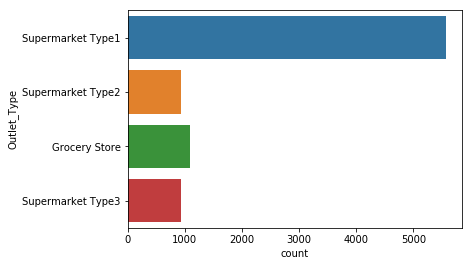

In [534]:
sns.countplot(data = data , y ='Outlet_Type')

Here, Supermarket Type1 is most prefered by the people with a higher range of 5000

##### Outlet_Location_Type - plot

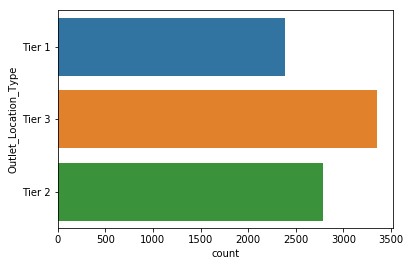

In [535]:
sns.countplot(data = data , y ='Outlet_Location_Type')

Tier 3 locations for mart are most prefered. 

##### Outlet_Establishment_Year

(array([2395.,    0.,    0.,    0.,    0., 2415.,    0., 1859.,    0.,
        1854.]),
 array([1985. , 1987.4, 1989.8, 1992.2, 1994.6, 1997. , 1999.4, 2001.8,
        2004.2, 2006.6, 2009. ]),
 <a list of 10 Patch objects>)

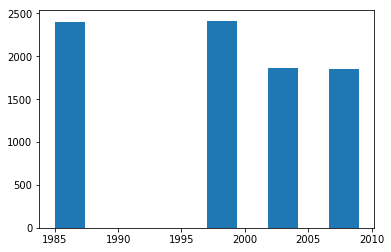

In [536]:
plt.hist(data=data, x='Outlet_Establishment_Year')

##### Item_MRP - plot

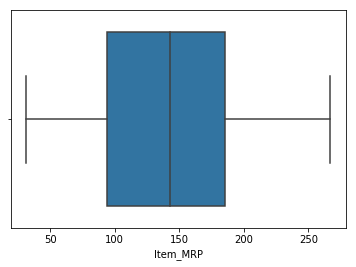

In [537]:
sns.boxplot(data=data,x='Item_MRP')

It's good for the model to have such kind of Prediciton range. It will remains same.

(array([168., 283., 267., 205., 247., 168.,  10., 148., 193., 284., 278.,
        298., 298., 322., 284., 344., 246.,  49., 180., 329., 310., 270.,
        277., 241., 331., 291., 300., 278., 195.,  32., 128., 125., 141.,
        162., 126., 128., 129., 142., 159., 157.]),
 array([ 31.29   ,  37.17996,  43.06992,  48.95988,  54.84984,  60.7398 ,
         66.62976,  72.51972,  78.40968,  84.29964,  90.1896 ,  96.07956,
        101.96952, 107.85948, 113.74944, 119.6394 , 125.52936, 131.41932,
        137.30928, 143.19924, 149.0892 , 154.97916, 160.86912, 166.75908,
        172.64904, 178.539  , 184.42896, 190.31892, 196.20888, 202.09884,
        207.9888 , 213.87876, 219.76872, 225.65868, 231.54864, 237.4386 ,
        243.32856, 249.21852, 255.10848, 260.99844, 266.8884 ]),
 <a list of 40 Patch objects>)

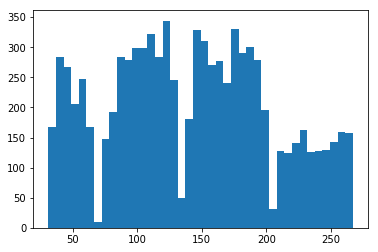

In [538]:
plt.hist(data=data,x='Item_MRP',bins=40)

Now move to the bivairate analysis to more specify what is least prefered data so that we can eliminate it or considered it as well.

## Bivariate Analysis 

In [539]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


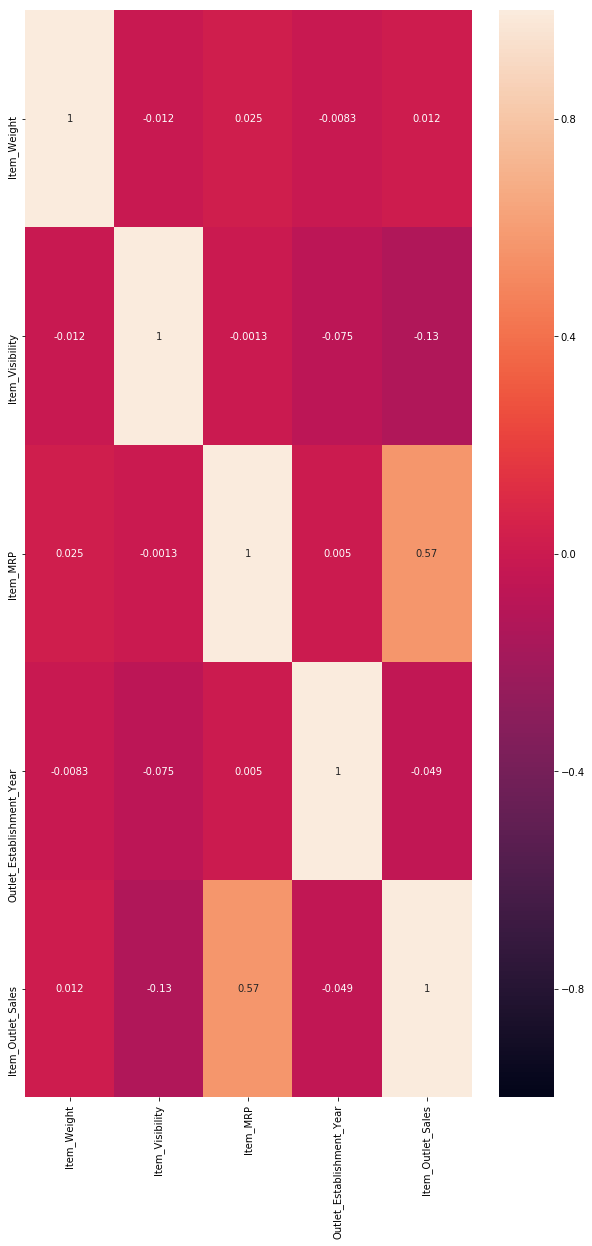

In [540]:
#correlation between columns pairwise
plt.figure(figsize=(10,20))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,square=False)

### Bivariate Analysis using regplot

### Item_MRP vs Item_outlet_sales

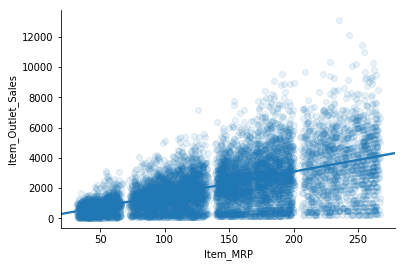

In [541]:
sns.regplot(data=data , y='Item_Outlet_Sales' , x='Item_MRP',y_jitter=0.2,scatter_kws={'alpha':0.1})
sns.despine()

There is posstive correlation between the above two axis and average price product with range of 100 -150 are more.

### Outlet_Establishment_Year vs Item_MRP

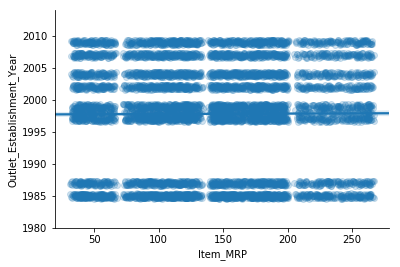

In [542]:
sns.regplot(data = data,y='Outlet_Establishment_Year',x='Item_MRP',y_jitter=0.4,scatter_kws={'alpha':0.2})
sns.despine()

### Inlet_Outlet_Sales vs Outlet_Establishment_Year

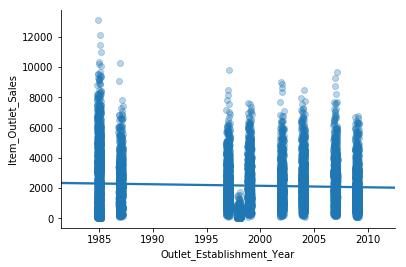

In [543]:
sns.regplot(data = data,y='Item_Outlet_Sales',x='Outlet_Establishment_Year',x_jitter=0.2,scatter_kws={'alpha':0.3})
sns.despine()

from above we can infer that the previous or old outlet sales are dominated over the new one.

#### Joint plot for the above one

C:\Users\honey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\honey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


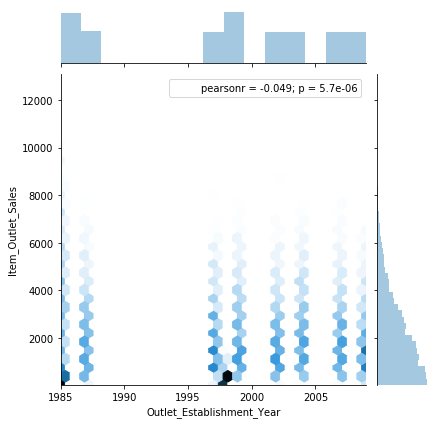

In [544]:
sns.jointplot(data = data, y='Item_Outlet_Sales',x='Outlet_Establishment_Year',kind="hex")

### Feature Engineering

In [545]:
data.pivot_table(values='Item_Outlet_Sales' , index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


As from the above table it is clear that to make our data more efficient for analysis we won't be able to combine these two (Supermarket Type1 and Supermarket Type2 or with Supermarket Type3) because there values have a significance difference in between them.

Now for another part of feature engineering we come for feature Item_Visibility, or in other words by looking directly into the column "Item_Visibility" we came to know that there is some entries available with value '0' , which doesn't even make any sense. so for better prediction we have to treat these values.

To remove '0' from the above we may impute these values by average or mean.

In [546]:
# First calculating average so that zeros in column Item_Visibility can be replaced
avg_vis = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

avg_vis

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
DRB24,0.020624
DRB25,0.077305
DRB48,0.023700
DRC01,0.019219


In [547]:
avg = data['Item_Visibility'].mean()
avg

0.06613202877895127

In [548]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0,avg)

In [549]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Now, after "Item_visibility" if we have look at another column "Item_Type" one new column be made by compacting this enlarge variety in it.

In [550]:
data['Item_Type'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# now renaming the new assigned into a different cluster
data['Item_Type'] = data['Item_Type'].map({'FD':'Food',
                                                  'NC':'Non-Consumable',
                                                  'DR':'Drinks'})
                                                  
data['Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type, dtype: int64

From the above table, we can conclude that total values of 'Food' , 'Non-Consumable' and 'Drinks' have values "6125","1599" and "799"
respectively.

In [551]:
# right now shape of data
data.shape

(8523, 12)

In [552]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We should also work on the addition feature of dataset which tells us about the condition as well as popularity of mart.For this we can find out the difference of Outlet_Establishment from 2013 (as the dataset is till that year). Finally after doing this we will be able to get how old that is.

In [553]:
data.loc[data['Item_Type']=='Non-Consumable','Item_Fat_Content']='Non Edible'

In [554]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non Edible,0.066132,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [555]:
data['Outlet_Years'] = 2013-data['Outlet_Establishment_Year']

data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

Minimum year value is '4' and maximum year value is '28' years old.

In [556]:
# now converting categorical values into the numeric ones
#importing library from sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#fiting label encoder using fit_transform()


mod = ['Item_Fat_Content','Outlet_Type','Outlet_Size','Item_Type','Outlet_Location_Type']

le = preprocessing.LabelEncoder()
for i in mod:
    data[i]= le.fit_transform(data[i])


In [557]:
#data_1 = pd.get_dummies(data,columns = ['Item_Fat_Content','Outlet_Type','Outlet_Size','Item_Type','Outlet_Location_Type'])
#data_1

In [558]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,0,0.016047,1,249.8092,OUT049,1999,1,0,1,3735.1380,14
1,DRC01,5.92,2,0.019278,0,48.2692,OUT018,2009,1,2,2,443.4228,4
2,FDN15,17.50,0,0.016760,1,141.6180,OUT049,1999,1,0,1,2097.2700,14
3,FDX07,19.20,2,0.066132,1,182.0950,OUT010,1998,2,2,0,732.3800,15
4,NCD19,8.93,1,0.066132,2,53.8614,OUT013,1987,0,2,1,994.7052,26


In [559]:

df = data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,0,0.016047,1,249.8092,OUT049,1999,1,0,1,3735.1380,14
1,DRC01,5.92,2,0.019278,0,48.2692,OUT018,2009,1,2,2,443.4228,4
2,FDN15,17.50,0,0.016760,1,141.6180,OUT049,1999,1,0,1,2097.2700,14
3,FDX07,19.20,2,0.066132,1,182.0950,OUT010,1998,2,2,0,732.3800,15
4,NCD19,8.93,1,0.066132,2,53.8614,OUT013,1987,0,2,1,994.7052,26


In [560]:
# Now dropping the already converted columns which has least preference
df.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'],axis =1,inplace=True)

In [561]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.30,0,0.016047,1,249.8092,1,0,1,3735.1380,14
1,5.92,2,0.019278,0,48.2692,1,2,2,443.4228,4
2,17.50,0,0.016760,1,141.6180,1,0,1,2097.2700,14
3,19.20,2,0.066132,1,182.0950,2,2,0,732.3800,15
4,8.93,1,0.066132,2,53.8614,0,2,1,994.7052,26


### Model training and testing 

### Using Linear Regression Model

In [404]:
#Importing libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

l_r = LinearRegression()

In [562]:
x = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [563]:
# dividing dataset for training and testing

x_train ,x_test ,y_train ,y_test = train_test_split(x , y , test_size=0.30 , random_state = 20)

In [564]:
data_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1572 entries, Item_Visibility to Outlet_Location_Type_2
dtypes: float64(1), int64(1), uint8(1570)
memory usage: 12.9 MB


In [565]:
# fiting of training set into model
l_r.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [566]:
# predicted value
y_predicted = l_r.predict(x_test)

In [567]:
# score of linear regression
l_r.score(x_test,y_test)

0.5089362125882498

### Using GBR(Gradient Boosting Regressor)

In [570]:
#importing GBR
from sklearn.ensemble import GradientBoostingRegressor
par={'n_estimators':[10,20,50,100,150,500]}

In [573]:
#initialising it to a variable
gbr=GradientBoostingRegressor()

In [574]:
#importing grid search
from sklearn.model_selection import GridSearchCV
gr=GridSearchCV(gbr,par)

In [578]:
# fiting into gbr model
gr.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 150, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [576]:
gr.best_params_

{'n_estimators': 50}

In [577]:
#taking estimator value=50
gbr=GradientBoostingRegressor(n_estimators=50)

In [579]:
#fitting after grid search
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [580]:
# Predicting on gbr model
gbr_pred=gbr.predict(x_test)

In [581]:
# final score of model
gbr.score(x_test,y_test)

0.6058339255245827